In [1]:
import os
#import warnings
#warnings.simplefilter('ignore')
from operator import attrgetter
import scipy as sp
import scipy.ndimage
import numpy as np
import pandas as pd
import skimage
import skimage.measure
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import h5py
from tqdm import tqdm_notebook
from IPython.display import display
import skimage.io
import scipy.misc


/home/subodh_pushkar/anaconda3/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [7]:
h5f = h5py.File("hdf_files/RIM_ONE_v3.hdf5", "r")

In [9]:
X = h5f['RIM-ONE v3/256 px/images']
Y = h5f['RIM-ONE v3/256 px/disc']

In [10]:
print(X.shape, Y.shape)

(159, 256, 256, 3) (159, 256, 256, 1)


In [11]:
# picName = 'dataset/db/' + str(itr)+'.jpg'
# itr = itr + 1
from PIL import Image

for i in range(159):
    im = Image.fromarray(X[i,:,:,:])
    picName = 'dataset/data/images/' + str(i)+'.jpg'
    im.save(picName)
#     picName = 'dataset/db/disc' + str(i)+'.png'
#     scipy.misc.imsave(picName, Y[i,:,:,:])
#     cv2.imwrite(picName, X[i,:,:,:])

In [13]:
# picName = 'dataset/db/' + str(itr)+'.jpg'
# itr = itr + 1
from PIL import Image

for i in range(159):
    im = Image.fromarray(Y[i,:,:,0])
    picName = 'dataset/data/disc/' + str(i)+'.png'
    im.save(picName)
#     picName = 'dataset/db/disc' + str(i)+'.png'
#     scipy.misc.imsave(picName, Y[i,:,:,:])
#     cv2.imwrite(picName, X[i,:,:,:])

In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

(1424, 1424)
173
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


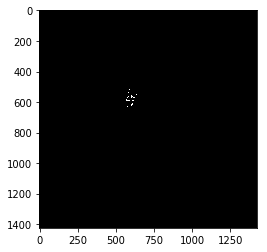

In [31]:


# finalglucoma_classificationTraining400Glaucoma
img = cv2.imread('dataset/RIM-ONEv3/images/1.jpg',0)
plt.imshow(img, cmap='gray')
# cv2.imshow('image',img)
print(img.shape)
print(img.max())
M = img.max()
plt.imshow(img, cmap='gray')
plt.imshow(img>=M-10,cmap='gray')
print(img>120)



173


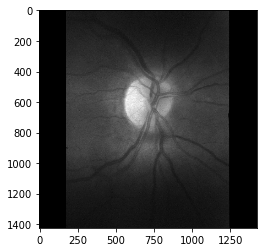

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
605
624


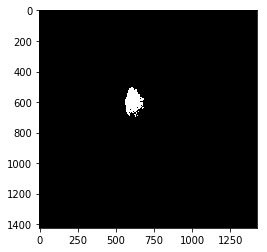

In [32]:
img = cv2.imread('dataset/RIM-ONEv3/images/1.jpg',0)
plt.imshow(img, cmap='gray')
# cv2.imshow('image',img)
m,n = img.shape
print(img.max())
M = img.max()
plt.imshow(img, cmap='gray')
plt.show()
plt.imshow(img>=M-30,cmap='gray')
print(img>120)
count=0
x=0;
y=0;
for i in range(m):
    for j in range(n):
        if img[i,j]>=M-45:
            x+=i
            y+=j
            count = count+1

xc = int(x/count)
yc = int(y/count)
print(xc)
print(yc)

(1424, 1424, 3)


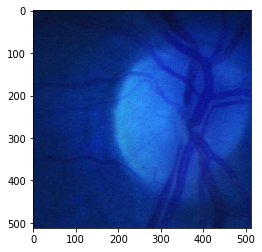

In [35]:
img2 = cv2.imread('dataset/RIM-ONEv3/images/1.jpg',1)
print(img2.shape)

if yc-256<0:
    img_crop= img2[xc-256:xc+256,yc:256,:]
else:
    img_crop= img2[xc-256:xc+256,yc-256:yc+256,:]
plt.imshow(img_crop)
plt.show()
# print(img_crop)

In [2]:
import glob
from skimage.transform import rescale, resize
filelist = glob.glob('dataset/RIM-ONEv3/images/*.jpg')
itr=0
for fname in filelist:
    img = cv2.imread(fname,0)
#     plt.imshow(img, cmap='gray')
    # cv2.imshow('image',img)
    m,n = img.shape
#     print(img.max())
    M = img.max()
#     plt.imshow(img, cmap='gray')
#     plt.show()
#     plt.imshow(img>=M-30,cmap='gray')
#     print(img>120)
    count=0
    x=0;
    y=0;
    for i in range(100,m-100):
        for j in range(100,n-100):
            if img[i,j]>=M-40:
                x+=i
                y+=j
                count = count+1

    xc = int(x/count)
    yc = int(y/count)
    print(yc,xc)
#     print(yc)
    img2 = cv2.imread(fname,1)
#     print(img2.shape)
    print(fname[24:])
    dname = 'dataset/RIM-ONEv3/discs'+fname[24:-4]+'.png'
    img3 = cv2.imread(dname,0)
    print(dname)
    if yc-275<0:
        img_crop= img2[xc-275:xc+275,yc:275,:]
        img_crop2= img3[xc-275:xc+275,yc:275]
    else:
        img_crop= img2[xc-275:xc+275,yc-275:yc+275,:]
        img_crop2= img3[xc-275:xc+275,yc-275:yc+275]

      
    resized_image = cv2.resize(img_crop, (128, 128))
    resized_image2 = cv2.resize(img_crop2, (128, 128)) 
    #     plt.imshow(img_crop)
#     plt.show()
    # print(img_crop)
    picName = 'dataset/crop/RIM-ONEv3/images/' + str(itr)+'.jpg'
    picName2 = 'dataset/crop/RIM-ONEv3/discs/' + str(itr)+'.png'
    itr = itr + 1
    cv2.imwrite(picName, resized_image)
    cv2.imwrite(picName2, resized_image2)

616 605
/137.jpg
dataset/RIM-ONEv3/discs/137.png
713 663
/142.jpg
dataset/RIM-ONEv3/discs/142.png
860 539
/77.jpg
dataset/RIM-ONEv3/discs/77.png
735 699
/30.jpg
dataset/RIM-ONEv3/discs/30.png
735 668
/140.jpg
dataset/RIM-ONEv3/discs/140.png
572 699
/53.jpg
dataset/RIM-ONEv3/discs/53.png
653 670
/96.jpg
dataset/RIM-ONEv3/discs/96.png
688 679
/15.jpg
dataset/RIM-ONEv3/discs/15.png
700 733
/27.jpg
dataset/RIM-ONEv3/discs/27.png
743 654
/56.jpg
dataset/RIM-ONEv3/discs/56.png
698 653
/101.jpg
dataset/RIM-ONEv3/discs/101.png
808 666
/135.jpg
dataset/RIM-ONEv3/discs/135.png
795 666
/83.jpg
dataset/RIM-ONEv3/discs/83.png
728 671
/39.jpg
dataset/RIM-ONEv3/discs/39.png
827 606
/147.jpg
dataset/RIM-ONEv3/discs/147.png
645 582
/100.jpg
dataset/RIM-ONEv3/discs/100.png
730 704
/6.jpg
dataset/RIM-ONEv3/discs/6.png
679 779
/111.jpg
dataset/RIM-ONEv3/discs/111.png
733 606
/74.jpg
dataset/RIM-ONEv3/discs/74.png
709 639
/44.jpg
dataset/RIM-ONEv3/discs/44.png
657 719
/29.jpg
dataset/RIM-ONEv3/discs/29.png

In [30]:
import glob
from PIL import Image
from skimage.transform import rescale, resize
filelist = glob.glob('dataset/RIM-ONEv2/images/*.jpg')
itr=0
for fname in filelist:
    im1 = Image.open(fname)
    width = 128
    height = 128
    dname = 'dataset/RIM-ONEv2/discs'+fname[24:-4]+'-gs_mask.jpg'
    img3 = Image.open(dname)
    resizeI = im1.resize((width, height), Image.ANTIALIAS)
    resizeD = img3.resize((width, height), Image.ANTIALIAS)
    #     plt.imshow(img_crop)
#     plt.show()
    # print(img_crop)
    ext = str(itr) + ".jpg"
    picName = 'dataset/crop/RIM-ONEv2/images/' + str(itr)+'.jpg'
    picName2 = 'dataset/crop/RIM-ONEv2/discs/' + str(itr)+'.png'
    
#     cv2.imwrite(picName, img_crop)
#     cv2.imwrite(picName2, img_crop2)
    resizeI.save("dataset/crop/RIM-ONEv2/images/" + ext)
    resizeD.save("dataset/crop/RIM-ONEv2/discs/" + str(itr) + ".png")
    itr = itr + 1
    
    
    


# # resize an image using the PIL image library
# # free from:  http://www.pythonware.com/products/pil/index.htm
# # tested with Python24        vegaseat     11oct2005
# import Image
# # open an image file (.bmp,.jpg,.png,.gif) you have in the working folder
# imageFile = "zFlowers.jpg"
# im1 = Image.open(imageFile)
# # adjust width and height to your needs
# width = 500
# height = 420
# # use one of these filter options to resize the image
# im2 = im1.resize((width, height), Image.NEAREST)      # use nearest neighbour
# im3 = im1.resize((width, height), Image.BILINEAR)     # linear interpolation in a 2x2 environment
# im4 = im1.resize((width, height), Image.BICUBIC)      # cubic spline interpolation in a 4x4 environment
# im5 = im1.resize((width, height), Image.ANTIALIAS)    # best down-sizing filter
# ext = ".jpg"
# im2.save("NEAREST" + ext)
# im3.save("BILINEAR" + ext)
# im4.save("BICUBIC" + ext)
# im5.save("ANTIALIAS" + ext)
# # optional image viewer ...
# # image viewer  i_view32.exe   free download from:  http://www.irfanview.com/
# # avoids the many huge bitmap files generated by PIL's show()
# import os
# os.system("d:/python24/i_view32.exe %s" % "BILINEAR.jpg")

